# Setup vizdoom

In [1]:
!pip install vizdoom

In [2]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

Den angivne sti blev ikke fundet.
fatal: destination path 'ViZDoom' already exists and is not an empty directory.


In [3]:
from vizdoom import * 
import time
import numpy as np

In [4]:
# Setup game
game = DoomGame()
game.load_config('scenarios/basic.cfg')
game.init()

In [5]:
actions = np.identity(3, dtype=np.uint8)

In [6]:
state = game.get_state()

In [7]:
state.game_variables

array([50.])

In [8]:
game.close()

# Setup gym  env for vizdoom

In [9]:
!pip install gym

In [11]:
from gym import Env
from gym.spaces import Discrete, Box
import cv2

In [12]:
class VizDoomGym(Env): 
    def __init__(self, render=False): 
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('scenarios/basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        self.game.init()
        
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    def step(self, action):
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    def render(): 
        pass
    
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    def close(self): 
        self.game.close()

In [13]:
env = VizDoomGym(render=True)

In [14]:
state = env.reset()

# View Game State

In [15]:
env.reset()

array([[[55],
        [50],
        [59],
        ...,
        [57],
        [57],
        [66]],

       [[68],
        [65],
        [65],
        ...,
        [56],
        [67],
        [72]],

       [[49],
        [79],
        [66],
        ...,
        [79],
        [51],
        [29]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [16]:
env.close()

In [17]:
!pip install matplotlib

In [18]:
from matplotlib import pyplot as plt

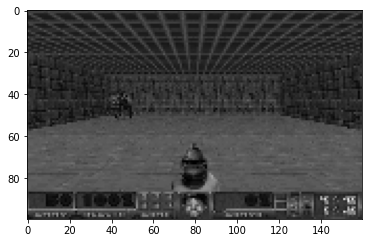

In [19]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

# Setup Callback

In [23]:
!pip install torch==1.10.2+cu102 torchvision==0.11.3+cu102 torchaudio===0.10.2+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     ---------------------------------------- 1.5/1.5 GB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 27.6 MB/s eta 0:00:00
     -------------------------------------- 336.5/336.5 KB 3.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
  Rolling back uninstall of torch
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\caffe2\
   from C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\~affe2
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\torch-1.9.0.dist-info\
   from C:\Users\Mathias\A


× The package index page being used does not have a proper HTML doctype declaration.
╰─> Problematic URL: https://download.pytorch.org/whl/cu102/torch_stable.html

note: This is an issue with the page at the URL mentioned above.
hint: You might need to reach out to the owner of that package index, to get this fixed. See https://github.com/pypa/pip/issues/10825 for context.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Mathias\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\caffe2\\python\\serialized_test\\data\\operator_test\\collect_and_distribute_fpn_rpn_proposals_op_test.test_collect_and_dist.zip'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



   from C:\Users\Mathias\AppData\Local\Temp\pip-uninstall-4niqf_oh\__config__.py
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\torch\__future__.py
   from C:\Users\Mathias\AppData\Local\Temp\pip-uninstall-4niqf_oh\__future__.py
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\torch\__init__.py
   from C:\Users\Mathias\AppData\Local\Temp\pip-uninstall-4niqf_oh\__init__.py
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\torch\__pycache__\__config__.cpython-39.pyc
   from C:\Users\Mathias\AppData\Local\Temp\pip-uninstall-4niqf_oh\__pycache__\__config__.cpython-39.pyc
  Moving to c:\users\mathias\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-

In [24]:
!pip install stable-baselines3[extra]

In [25]:
import os 
from stable_baselines3.common.callbacks import BaseCallback

ModuleNotFoundError: No module named 'torch._C'

In [26]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

NameError: name 'BaseCallback' is not defined

In [ ]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [ ]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Train Model

In [ ]:
from stable_baselines3 import PPO

In [ ]:
env = VizDoomGym()

In [ ]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=100000, callback=callback)

# Test the Model

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
model = PPO.load('./train/train_basic/best_model_50000')

In [ ]:
env = VizDoomGym(render=True)

In [ ]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)

In [ ]:
mean_reward

86.9

In [ ]:
for episode in range(100): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

Total Reward for episode 95.0 is 0
Total Reward for episode -300.0 is 1
Total Reward for episode 95.0 is 2
Total Reward for episode 95.0 is 3
Total Reward for episode 64.0 is 4
Total Reward for episode 95.0 is 5
Total Reward for episode -300.0 is 6
Total Reward for episode 67.0 is 7
Total Reward for episode 95.0 is 8
Total Reward for episode 95.0 is 9
Total Reward for episode -300.0 is 10
Total Reward for episode 95.0 is 11
Total Reward for episode 55.0 is 12
Total Reward for episode 95.0 is 13
Total Reward for episode 95.0 is 14
Total Reward for episode 95.0 is 15


ViZDoomUnexpectedExitException: Controlled ViZDoom instance exited unexpectedly.